In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("homeprices.csv")

In [3]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


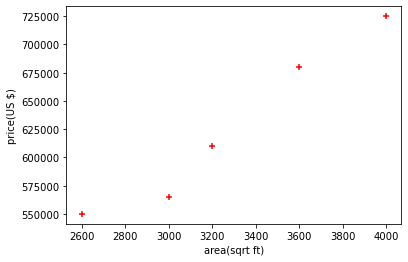

In [4]:
# plot a scatter plot to just have a visual of distribution of datapoints
%matplotlib inline
plt.xlabel("area(sqrt ft)")
plt.ylabel("price(US $)")
plt.scatter(df['area'],df['price'],color="red",marker="+")

In [5]:
new_df = df.drop('price',axis=1)
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [6]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [7]:
# Now we understood that we can use linear regression in this model 
# so we need to create a linear regression object first
reg = linear_model.LinearRegression()   # created object for linear regression
reg.fit(new_df,price)   # fitting means training the data with available data points
# first argument must be like 2-d array  so we have supplied area 

LinearRegression()

In [8]:
# predict the price of home whoes area is 3300 sq ft
reg.predict([[3300]])

C:\Users\chait\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [9]:
# If we have find out the coefficient of x or the slope 
reg.coef_

array([135.78767123])

In [10]:
# If we need to find out y intercept then :
reg.intercept_

180616.43835616432

In [11]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

In [12]:
reg.predict([[5000]])

C:\Users\chait\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

# Generate CSV file with list of home price predictions

In [13]:
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [14]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [15]:
# Now to add predicted prices column in the list areas 
area_df['prices']=p

In [16]:
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [17]:
area_df.to_csv("prediction.csv")

In [18]:
import pickle

In [19]:
with open('model_pickle','wb') as f:
    pickle.dump(reg,f)

In [20]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

In [21]:
mp.predict([[5000]])

C:\Users\chait\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [26]:
import joblib

In [28]:
joblib.dump(reg,'model_joblib')

['model_joblib']

In [29]:
mj = joblib.load('model_joblib')

In [30]:
mj.predict([[5000]])

C:\Users\chait\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])